# SDSSRM-XCS gas fraction: Evolution with mass?

This section of the project uses the properties measured in the first paper of this series [(Turner et al. 2024)](https://ui.adsabs.harvard.edu/abs/2025MNRAS.tmp...10T/abstract), specifically total/hydrostatic mass ($M_{\rm{tot}}$, or $M^{\rm{tot}}_{\Delta}$ within an overdensity radius $R_{\Delta}$), and hot gas mass of galaxy clusters and groups ($M_{\rm{gas}}$, or $M^{\rm{gas}}_{\Delta}$), to measure the gas fraction ($f_{\rm{gas}}$). This is ratio of mass contained in the hot ICM, to the overall halo mass, and in a perfect Universe would be 'set' just by the Universe's overall baryon fraction.

That is a simplification however, and in reality a whole host of factors contribute to shifting cluster $f_{\rm{gas}}$ from the cosmic value, not least of which is the fact that in **this measurement** we are not taking into account all the baryons in a cluster (some are locked in galaxies/stars, some are in cooler phases of the ICM). Other factors include feedback processes, which can have outsized effects on lower-mass clusters and groups, causing their hot ICM to 'puff up' and be pushed to the very outskirts of the halo. Previous work has identified an evolution of the baryon fraction with halo mass.

As the first paper of this series produced a dataset with measures of the total and hot-gas masses, and we have already measured $M_{\rm{tot}}$-$M_{\rm{gas}}$ scaling relations, we take this opportunity to make a new measure of the gas fraction in clusters

Scaling relation fits were performed using the XGA interface to the R scaling-relation fitting package LIRA, see the paper for full details.

## Main takeaways

In summary:

* ....

## Import Statements

In [4]:
from astropy.units import Quantity
import numpy as np
import pickle
import matplotlib.pyplot as plt 

# This adds the directory above to the path, allowing me to import the common functions that I've written in
#  common.py - this just saves me repeating boring code and makes sure its all consistent
import sys
sys.path.insert(0, '..')
from common import xcs_cosmo

In [57]:
import pandas as pd
samp = pd.read_csv("../../sample_files/SDSSRM-XCS_base_sample.csv")

samp['E'] = xcs_cosmo.efunc(samp['z'].values)
samp[['name', 'E']].to_csv('silly.csv', index=False)

In [2]:
with open('../../outputs/scaling_relations/sdssrm-xcs_new/mtot-mgas/turner2025_mtot500_mgas500.xgarel', 'rb') as scalo:
    mtot500_mgas500 = pickle.load(scalo)

In [3]:
with open('../../outputs/scaling_relations/sdssrm-xcs_new/mtot-mgas/turner2025_mtot2500_mgas2500.xgarel', 'rb') as scalo:
    mtot2500_mgas2500 = pickle.load(scalo)

In [8]:
(mtot500_mgas500.x_data[:, 0].min(), mtot500_mgas500.x_data[:, 0].max())

(<Quantity 1.32801386e+11 solMass>, <Quantity 1.74208397e+13 solMass>)

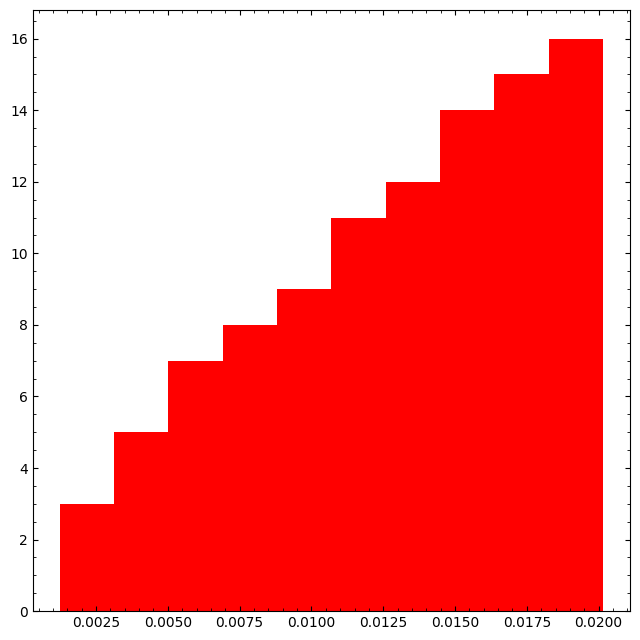

In [13]:
mgas500_range = Quantity(np.linspace(1.3e+11, 1.8e+13, 100), 'Msun')

plt.figure(figsize=(6.5, 6.5))
plt.minorticks_on()
plt.tick_params(which='both', direction='in', top=True, right=True)

plt.hist(mgas500_range / mtot500_mgas500.predict(mgas500_range), color='red')

plt.tight_layout()
plt.show()

In [14]:
(mtot2500_mgas2500.x_data[:, 0].min(), mtot2500_mgas2500.x_data[:, 0].max())

(<Quantity 1.07042704e+11 solMass>, <Quantity 6.5355119e+12 solMass>)

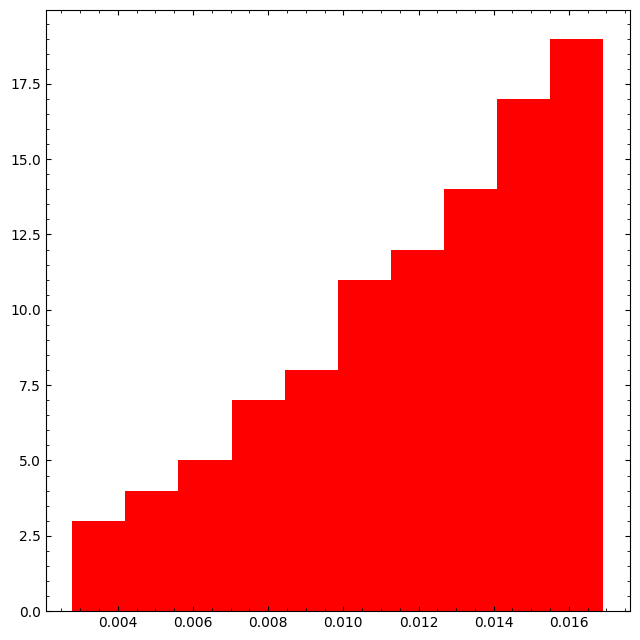

In [17]:
mgas500_range = Quantity(np.linspace(1.e+11, 7e+12, 100), 'Msun')

plt.figure(figsize=(6.5, 6.5))
plt.minorticks_on()
plt.tick_params(which='both', direction='in', top=True, right=True)

plt.hist(mgas500_range / mtot2500_mgas2500.predict(mgas500_range), color='red')

plt.tight_layout()
plt.show()

In [25]:
mtot500_mgas500.x_norm

<Quantity 1.e+13 solMass>

In [26]:
mtot500_mgas500.y_norm

<Quantity 1.e+14 solMass>

In [52]:
frac_bins = np.linspace(0, 1, 41)
frac_bins

array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
       0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
       0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 ,
       0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 , 0.875,
       0.9  , 0.925, 0.95 , 0.975, 1.   ])

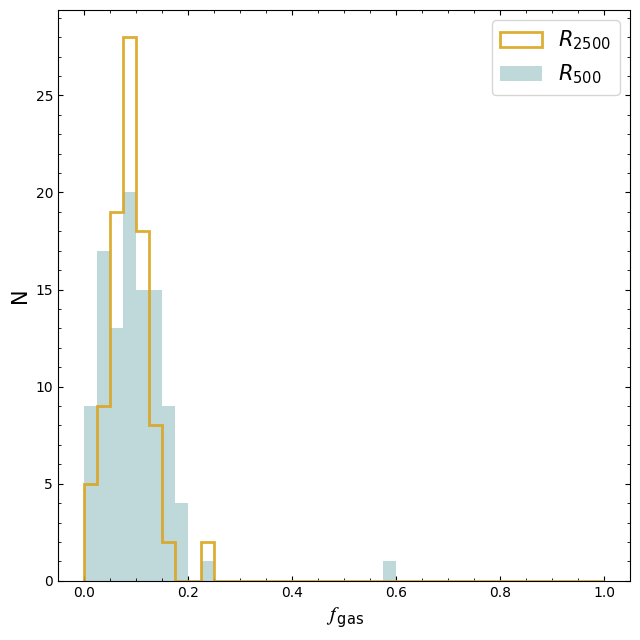

In [70]:
plt.figure(figsize=(6.5, 6.5))
plt.minorticks_on()
plt.tick_params(which='both', direction='in', top=True, right=True)

plt.hist((mtot2500_mgas2500.x_data[:, 0]/mtot2500_mgas2500.y_data[:, 0])*10, bins=frac_bins, color='goldenrod', 
         alpha=0.9, histtype='step', label=r'$R_{2500}$', linewidth=2)
plt.hist((mtot500_mgas500.x_data[:, 0]/mtot500_mgas500.y_data[:, 0])*10, bins=frac_bins, color='cadetblue', 
         alpha=0.4, histtype='stepfilled', label=r'$R_{500}$')

plt.xlabel(r"$𝑓_{\rm{gas}}$", fontsize=15)
plt.ylabel(r"N", fontsize=15)

plt.legend(fontsize=15)
plt.tight_layout()
plt.show()